<a href="https://colab.research.google.com/github/Salma-hmitti/Deep-Learning-TL/blob/main/DLTransfer_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow seaborn matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import files
uploaded = files.upload()
!unzip "fruits360.zip" -d . V

Saving fruits-360.zip to fruits-360.zip
unzip:  cannot find or open fruits360.zip, fruits360.zip.zip or fruits360.zip.ZIP.


In [3]:
!unzip "fruits-360.zip" -d .

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_35_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_36_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_37_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_38_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_39_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_3_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_40_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_41_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_42_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_43_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_44_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_45_100.jpg  
  inflating: ./fruits-360-100x100-main/Test/Avocado 1/r_46_100.jpg  
  inflating: ./fruits-360-

In [4]:
IMG_SIZE = 224
BATCH_SIZE = 32
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255,
rotation_range=20,
zoom_range=0.2,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=True
)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255
)
train_data = train_gen.flow_from_directory(
"/content/fruits-360-100x100-main/Training",
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
color_mode="rgb",
class_mode="categorical"
)
test_data = test_gen.flow_from_directory(
"/content/fruits-360-100x100-main/Test",
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
color_mode="rgb",
class_mode="categorical",
shuffle=False
)

Found 4023 images belonging to 10 classes.
Found 1340 images belonging to 10 classes.


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
base_vgg = VGG16(
weights='imagenet',
include_top=False,
input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
# Geler les couches convolutionnelles
for layer in base_vgg.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x = Flatten()(base_vgg.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)
model_vgg = Model(base_vgg.input, output)
model_vgg.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
model_vgg.compile(
loss='categorical_crossentropy',
optimizer=tf.keras.optimizers.Adam(1e-4),
metrics=['accuracy']
)
history_vgg = model_vgg.fit(
train_data,
validation_data=test_data,
epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 97s 654ms/step - accuracy: 0.6522 - loss: 1.1101 - val_accuracy: 0.9784 - val_loss: 0.0980
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 60s 476ms/step - accuracy: 0.9815 - loss: 0.1107 - val_accuracy: 0.9933 - val_loss: 0.0324
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 59s 468ms/step - accuracy: 0.9968 - loss: 0.0460 - val_accuracy: 0.9970 - val_loss: 0.0146
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 59s 469ms/step - accuracy: 0.9981 - loss: 0.0285 - val_accuracy: 0.9985 - val_loss: 0.0094
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 59s 469ms/step - accuracy: 0.9993 - loss: 0.0186 - val_accuracy: 0.9970 - val_loss: 0.0107
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 60s 470ms/step - accuracy: 0.9989 - loss: 0.0138 - val_accuracy: 0.9985 - val_loss: 0.0064
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 59s 468ms/step - accuracy: 0.9997 - loss: 0.0117 - val_accuracy: 0.9970 - val_loss: 0.0090
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 59s 468ms/step - accuracy: 0.9989 - loss: 0

In [9]:
for layer in base_vgg.layers[-4:]:
    layer.trainable = True
model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(1e-5),
    metrics=['accuracy']
)
history_vgg_ft = model_vgg.fit(
  train_data,
  validation_data=test_data,
  epochs=5
)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 73s 527ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 5.6133e-04
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 61s 487ms/step - accuracy: 1.0000 - loss: 8.4681e-04 - val_accuracy: 0.9978 - val_loss: 0.0054
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 62s 491ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9978 - val_loss: 0.0065
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 60s 479ms/step - accuracy: 0.9982 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 62s 492ms/step - accuracy: 1.0000 - loss: 4.0443e-04 - val_accuracy: 1.0000 - val_loss: 6.8122e-04


In [10]:
from tensorflow.keras.applications import ResNet50
base_resnet = ResNet50(
  weights='imagenet',
  include_top=False,
  input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
for layer in base_resnet.layers:
  layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
x = Flatten()(base_resnet.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)
model_resnet = Model(base_resnet.input, output)
model_resnet.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,280,650 (187.99 MB)

 Trainable params: 25,692,938 (98.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [12]:
model_resnet.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(1e-4),
  metrics=['accuracy']
)
history_resnet = model_resnet.fit(
  train_data,
  validation_data=test_data,
  epochs=10
)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 80s 532ms/step - accuracy: 0.1986 - loss: 2.4556 - val_accuracy: 0.3761 - val_loss: 1.7457
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 53s 423ms/step - accuracy: 0.3302 - loss: 1.8375 - val_accuracy: 0.5813 - val_loss: 1.4513
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 52s 413ms/step - accuracy: 0.3927 - loss: 1.6837 - val_accuracy: 0.5672 - val_loss: 1.2804
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 54s 424ms/step - accuracy: 0.3962 - loss: 1.6257 - val_accuracy: 0.6552 - val_loss: 1.1744
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 52s 411ms/step - accuracy: 0.4604 - loss: 1.4899 - val_accuracy: 0.6157 - val_loss: 1.2088
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 52s 410ms/step - accuracy: 0.4667 - loss: 1.4514 - val_accuracy: 0.7082 - val_loss: 1.0941
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 52s 410ms/step - accuracy: 0.4752 - loss: 1.3908 - val_accuracy: 0.6694 - val_loss: 1.0939
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 52s 410ms/step - accuracy: 0.5032 - loss: 1

In [13]:
for layer in base_resnet.layers[-10:]:
  layer.trainable = True
model_resnet.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(1e-5),
  metrics=['accuracy']
)
history_resnet_ft = model_resnet.fit(
  train_data,
  validation_data=test_data,
  epochs=5
)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 78s 503ms/step - accuracy: 0.4333 - loss: 1.8548 - val_accuracy: 0.2552 - val_loss: 2.9924
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 51s 408ms/step - accuracy: 0.6602 - loss: 0.9686 - val_accuracy: 0.2761 - val_loss: 2.8279
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 52s 412ms/step - accuracy: 0.7418 - loss: 0.7683 - val_accuracy: 0.6119 - val_loss: 0.9552
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 51s 405ms/step - accuracy: 0.7759 - loss: 0.6543 - val_accuracy: 0.8336 - val_loss: 0.4484
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 54s 425ms/step - accuracy: 0.8234 - loss: 0.5472 - val_accuracy: 0.8761 - val_loss: 0.3414


42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step


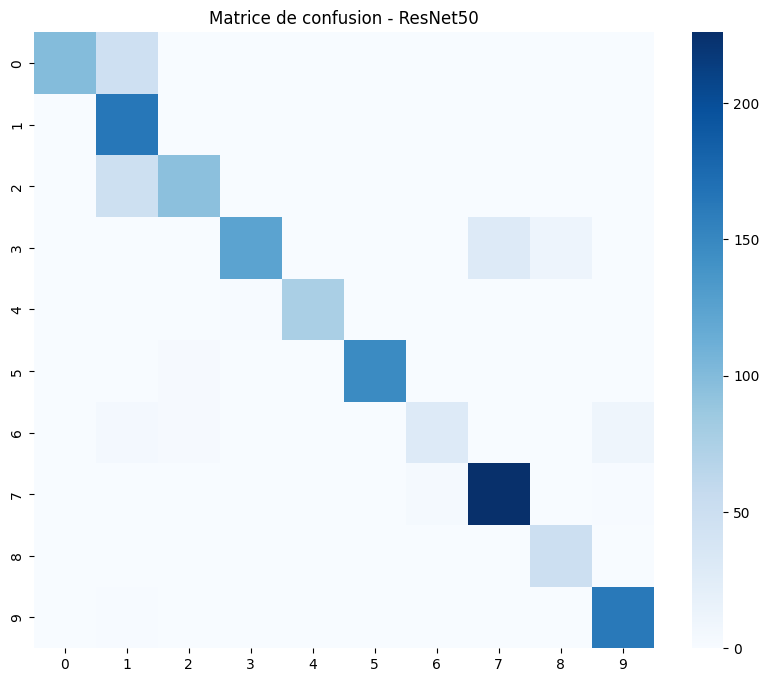

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
preds = model_resnet.predict(test_data)
pred_labels = np.argmax(preds, axis=1)
true_labels = test_data.classes
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Matrice de confusion - ResNet50")
plt.show()

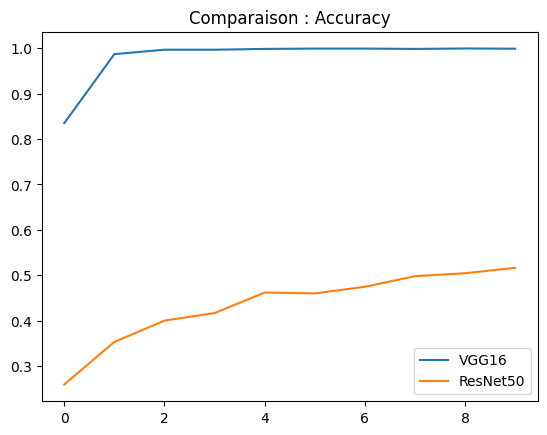

In [15]:
plt.plot(history_vgg.history['accuracy'], label='VGG16')
plt.plot(history_resnet.history['accuracy'], label='ResNet50')
plt.legend()
plt.title("Comparaison : Accuracy")
plt.show()